> K-means和K-median做聚类的思路是一样的，不同的是计算样本聚类的方法不同。  
K-means使用的是欧几里得距离；K-median使用的是曼哈顿距离(各个维度上得绝对值距离的和)

## 动态聚类：K-means方法
算法：
1. 选择K个点作为初始质心
1. 将每个点指派到最近的质心，形成K个簇（聚类）
1. 重新计算每个簇的质心
1. 重复2-3直至质心不发生变化

K-means算法的优点
* 有效率，而且不容易受初始值选择的影响
* 简单并且有数学原理支持 — EM算法
* 实际效果显著 — 数据挖掘中最常被引⽤用的算法之⼀一


K-means算法的缺点
* 对离群点太过敏敏感 — 去掉异常值再进行聚类
* 容易收敛到局部最优解 — ⽤用不同的初始值多次运行
* 不能发现非球状簇 — 更改相似度算法

### 难点：K值的确定

* 先验知识  
* 启发式的方法：选择不不同的K，根据聚类结果计算⽬目标函数的取值，选择合适的K。
先定义一个代价函数，找到其下降的拐点对应的K值。  
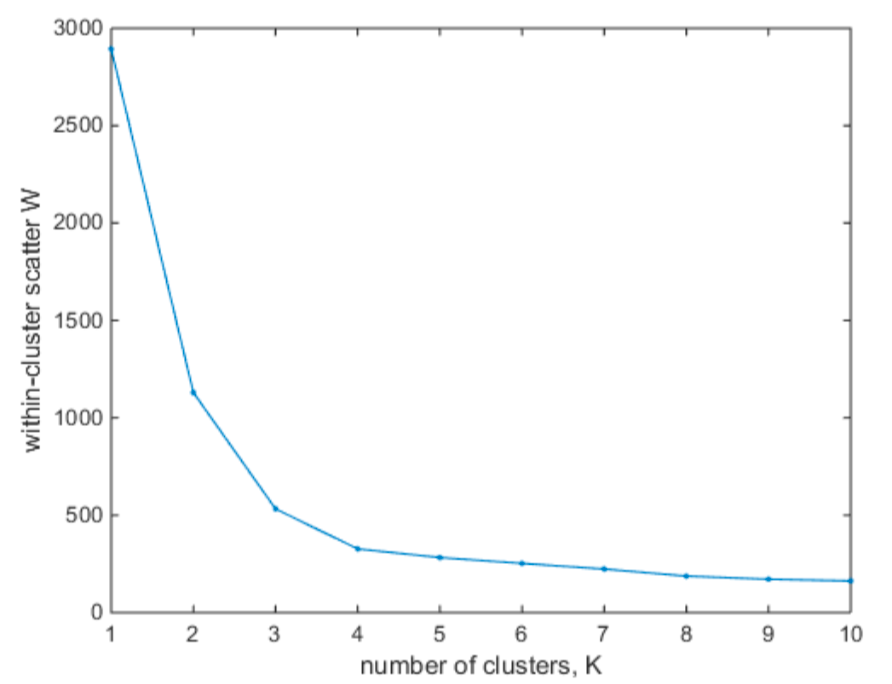

## 示例
https://blog.csdn.net/baimafujinji/article/details/77876528

In [2]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.array([[15, 17], [12,18], [14,15], [13,16], [12,15], [16,12],[4,6], [5,8], [5,3], [7,4], [7,2], [6,5]])

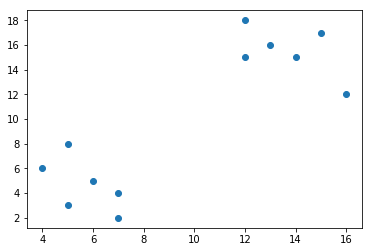

In [6]:
plt.scatter(X[:,0], X[:, 1])

### sklearn中的KMeans方法
KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')

#### Parameters


n_clusters : int, optional, default: 8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random' or an ndarray}
    Method for initialization, defaults to 'k-means++':

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose k observations (rows) at random from data for
    the initial centroids.

    If an ndarray is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

n_init : int, default: 10
    Number of time the k-means algorithm will be run with different
    centroid seeds. The final results will be the best output of
    n_init consecutive runs in terms of inertia.

max_iter : int, default: 300
    Maximum number of iterations of the k-means algorithm for a
    single run.

tol : float, default: 1e-4
    Relative tolerance with regards to inertia to declare convergence

precompute_distances : {'auto', True, False}
    Precompute distances (faster but takes more memory).

    'auto' : do not precompute distances if n_samples * n_clusters > 12
    million. This corresponds to about 100MB overhead per job using
    double precision.

    True : always precompute distances

    False : never precompute distances

verbose : int, default 0
    Verbosity mode.

random_state : int, RandomState instance or None, optional, default: None
    If int, random_state is the seed used by the random number generator;
    If RandomState instance, random_state is the random number generator;
    If None, the random number generator is the RandomState instance used
    by `np.random`.

copy_x : boolean, default True
    When pre-computing distances it is more numerically accurate to center
    the data first.  If copy_x is True, then the original data is not
    modified.  If False, the original data is modified, and put back before
    the function returns, but small numerical differences may be introduced
    by subtracting and then adding the data mean.

n_jobs : int
    The number of jobs to use for the computation. This works by computing
    each of the n_init runs in parallel.

    If -1 all CPUs are used. If 1 is given, no parallel computing code is
    used at all, which is useful for debugging. For n_jobs below -1,
    (n_cpus + 1 + n_jobs) are used. Thus for n_jobs = -2, all CPUs but one
    are used.

algorithm : "auto", "full" or "elkan", default="auto"
    K-means algorithm to use. The classical EM-style algorithm is "full".
    The "elkan" variation is more efficient by using the triangle
    inequality, but currently doesn't support sparse data. "auto" chooses
    "elkan" for dense data and "full" for sparse data.

In [7]:
model = KMeans(n_clusters=2, random_state=0)

In [8]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [10]:
y_pred = KMeans(n_clusters=2, random_state=0).fit_predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

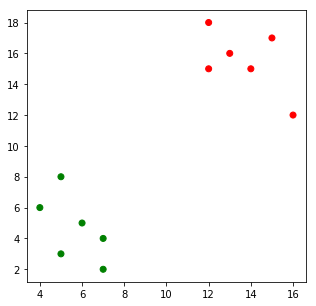

In [14]:
plt.figure(figsize=(5, 5))
color = ("red", "green")
colors = np.array(color)[y_pred]
plt.scatter(X[:, 0], X[:, 1], c=colors)

方法fit_predict的作用是计算聚类中心，并为输入的数据加上分类标签。下面我们再演示fit方法的使用，它仅仅产生聚类中心（其实也就是建模），然后我们引入两个新的点，并利用已经建立的模型预测它们的分类情况

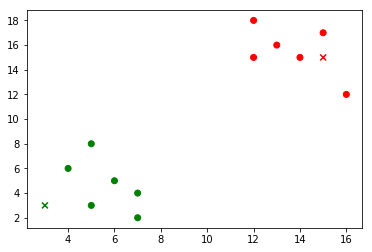

In [17]:
new_data = np.array([[3,3],[15,15]])
colors2 = np.array(color)[model.predict([[3,3],[15,15]])]
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.scatter(new_data[:, 0], new_data[:, 1], c=colors2, marker='x')

### 三、图像处理实例

现在我们希望用更少的色彩来展示这张图片（从而实现类似图像压缩的目的），例如之用64种颜色！显然，k-means可以帮助我们将原来的96615种色彩聚合成64个类，然后我们可将新的64个色彩中心作为新图像中所使用的色彩。这其实是类似实现了调色板的功能，如果读者对图像格式比较了解的话，可知很多图像格式中都有调色板的存在。

不仅如此，为了加速聚类过程，其实也并不需要让原来的96615种色彩都参与计算，我们可以随机从中选取部分（例如1000种）颜色来进行计算。